In [1]:
import DMeRates
import DMeRates.DMeRate as DMeRate
import numericalunits as nu
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
mX_array = np.concatenate((np.arange(0.2,0.8,0.025),np.array([0.9]),np.arange(1,5,0.05),np.arange(5,11,1),np.array([20,50,100,200,500,1000,10000]))) #MeV
FDMn = 2
halo_model = 'shm'
DoScreen = False
test_mX = 10 #MeV
test_mX_eV = test_mX*1e6
test_mX_unitized= test_mX * nu.MeV / nu.c0**2
ne = 1
cs = 1e-36
cs_unitized = cs * nu.cm**2

In [3]:
from QCDark.dark_matter_rates import d_rate,default_screening,default_si,read_output,default_astro
from QCDark.dark_matter_rates import form_factor as qcdark_form_factor



if DoScreen:
    screening = default_si
else:
    screening = default_screening
cff = read_output('QCDark/results/Si_final.hdf5')
Ee_old, dR_old= d_rate(test_mX_eV, cff, FDM_exp = FDMn, screening = screening, astro_model = default_astro)


from QEDark.QEDark2 import QEDark
qedark = QEDark()
Ee_qe = torch.arange(0,50,0.1)
drde_qedark = qedark.vectorized_dRdE('Si',test_mX_eV,Ee_qe,FDMn,'imb',DoScreen=DoScreen)


import DMeRates
import DMeRates.DMeRate
dmrates = DMeRate.DMeRate('Si',QEDark=False)
dmrates_qedark = DMeRate.DMeRate('Si',QEDark=True)


drde_qcdark_redo_res = dmrates.vectorized_dRdE(test_mX,FDMn,halo_model,DoScreen=DoScreen,integrate=True,unitize=True,debug=True) 
drde_qedark_redo = dmrates_qedark.vectorized_dRdE(test_mX,FDMn,'imb',DoScreen=DoScreen,integrate=False,unitize=True,debug=False)
drde_qcdark_redo = dmrates.vectorized_dRdE(test_mX,FDMn,halo_model,DoScreen=DoScreen,integrate=True,unitize=True,debug=False) 



Using form factor calculated from file: /Users/ansh/Local/SENSEI/DarkMatterRates/DMeRates/../QCDark/results/Si_final.hdf5
Returning:
band_gap_result,result,etas,prefactor,fdm_factor,ff_arr,tf_factor,qdenom


/Users/ansh/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/__init__.py:696: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/tensor/python_tensor.cpp:453.)
  _C._set_default_tensor_type(t)
/Users/ansh/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torchquad/integration/simpson.py:76: UserWarning: N per dimension cannot be even due to necessary subdivisions. N per dim will now be changed to the next lower integer, i.e. 1250 -> 1249.
  warnings.warn(
/Users/ansh/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **

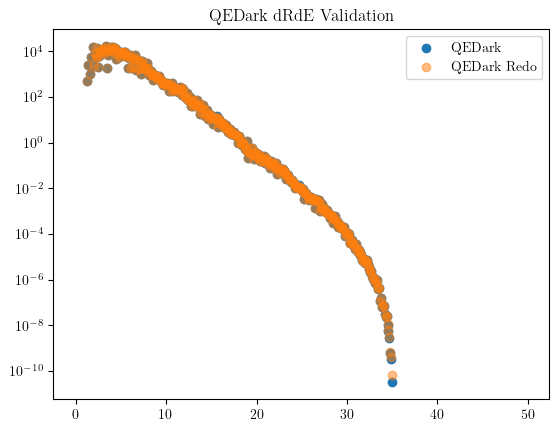

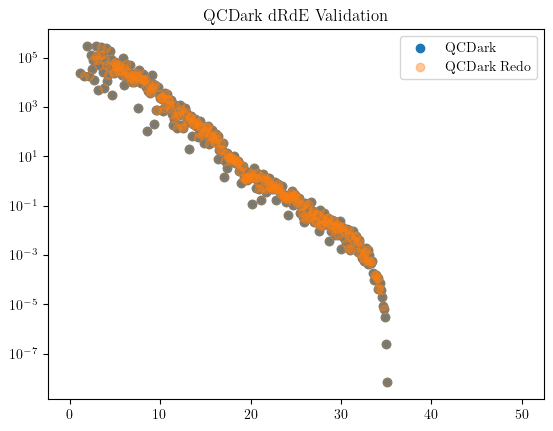

In [4]:
plt.scatter(Ee_qe,drde_qedark,label='QEDark')
plt.scatter(dmrates_qedark.Earr/nu.eV,drde_qedark_redo,label='QEDark Redo',alpha=0.5)
plt.yscale('log')
plt.legend()
plt.title('QEDark dRdE Validation')
plt.show()
plt.close()

plt.scatter(Ee_old,dR_old,label='QCDark')
plt.scatter(dmrates.Earr/nu.eV,drde_qcdark_redo,label='QCDark Redo',alpha=0.4)
plt.yscale('log')
plt.legend()
plt.title('QCDark dRdE Validation')
plt.show()
plt.close()


In [5]:
# from QCDark.dark_matter_rates import d_rate_FanoQ,d_rate_RamanathanQ

# ionizationFile = 'DMeRates/p100k.dat'
# ionization_model = 'R'

# Si_ff = qcdark_form_factor('QCDark/results/Si_final.hdf5')
# from QEDark.QEDark2 import QEDark
# qedark = QEDark()
# qedark_step= QEDark()
# qedark_step.change_to_step()

# qcdark_results = []
# qedark_results = []
# qcdark_results_step = []
# nes = [1,2,3,4,5,6,7,8,9,10]
# qedark_results_step = []

# for mX in mX_array: #MeV
#     qcdarkeresult = d_rate_RamanathanQ(mX*1e6, Si_ff, ionizationFile, FDM_exp = FDMn, screening = screening, astro_model = default_astro)
#     qcdarkeresult = qcdarkeresult[1][ne]
#     qcdark_results.append(qcdarkeresult)

#     qcdarkeresultstep = d_rate_FanoQ(mX*1e6, Si_ff, 3.8, FDM_exp = FDMn, screening = screening, astro_model = default_astro)
#     qcdarkeresultstep = qcdarkeresultstep[1][ne]
#     qcdark_results_step.append(qcdarkeresultstep)


#     qedarkresult = qedark.vectorized_dRdnE('Si',mX,nes,FDMn,'imb',DoScreen=DoScreen)[ne-1]
#     qedark_results.append(float(qedarkresult))
#     qedarkresultstep = qedark_step.vectorized_dRdnE('Si',mX,nes,FDMn,'imb',DoScreen=DoScreen)[ne-1]
#     qedark_results_step.append(float(qedarkresultstep))

# qedark_results = np.array(qedark_results)
# qcdark_results = np.array(qcdark_results)
# qedark_results_step = np.array(qedark_results_step)
# qcdark_results_step = np.array(qcdark_results_step)



In [6]:
# import DMeRates
# import DMeRates.DMeRate as DMeRate
# dmrates = DMeRate.DMeRate('Si',QEDark=False)
# dmrates_qedark = DMeRate.DMeRate('Si',QEDark=True)

# qcdark_redo = dmrates.calculate_rates(mX_array,'shm',FDMn,ne=nes,integrate=True,DoScreen=DoScreen)[ne-1] *nu.kg*nu.year
# qedark_redo = dmrates_qedark.calculate_rates(mX_array,'imb',FDMn,ne=nes,integrate=False,DoScreen=DoScreen)[ne-1] *nu.kg*nu.year


# dmrates_qedark.change_to_step()
# dmrates.change_to_step()

# qcdark_redo_step = dmrates.calculate_rates(mX_array,'shm',FDMn,ne=nes,integrate=True,DoScreen=DoScreen) *nu.kg*nu.year
# qedark_redo_step = dmrates_qedark.calculate_rates(mX_array,'imb',FDMn,ne=nes,integrate=False,DoScreen=DoScreen)[ne-1] *nu.kg*nu.year





In [7]:
# plt.plot(mX_array,qedark_results,label='QEDark')
# plt.plot(mX_array,qcdark_results,label='QCDark')
# plt.plot(mX_array,qedark_redo,label='QEDark Redo',ls='--')
# plt.plot(mX_array,qcdark_redo,label='QCDark Redo',ls='--')

# plt.legend()
# plt.xscale('log')
# # plt.yscale('log')

# plt.show()
# plt.close()

In [8]:
# plt.plot(mX_array,qedark_results_step,label='QEDark')
# plt.plot(mX_array,qcdark_results_step,label='QCDark')
# plt.plot(mX_array,qedark_redo_step,label='QEDark Redo',ls='--')
# plt.plot(mX_array,qcdark_redo_step,label='QCDark Redo',ls='--')

# plt.legend()
# plt.xscale('log')
# # plt.yscale('log')

# plt.show()
# plt.close()

In [44]:
#this is for testing wimprates
import DMeRates
import DMeRates.DMeRate as DMeRate
material = 'Xe'
dmrates = DMeRate.DMeRate(material)


import numericalunits as nu
from DMeRates.Constants import *


In [45]:
test_shell = '5p'
test_mX = 1000
test_mX_unitized = test_mX * nu.MeV / nu.c0**2
test_mX_eV = 1000*1e6

test_cs = 4e-44
FDMn = 2
halo_model = 'shm'

dmrates.update_crosssection(test_cs)
drs = dmrates.noble_dRdE(test_mX,FDMn,halo_model,isoangle=None,halo_id_params=None,useVerne=False,calcErrors=None,debug=False,unitize=True)


In [46]:
dr_5p_res = dmrates.rate_dme_shell(test_mX_unitized,FDMn,halo_model,test_shell,unitize=True,debug=True)

tensor([[0.0000e+00, 1.4086e-15]])
returning debug output:
integrated_result,prefactor,fdm_factor,ff_arr,etas,qArr,qmin,qmax


In [47]:
dr_5p_res[0]

tensor([7.0658e-07, 6.8600e-07, 6.6489e-07, 6.4360e-07, 6.2182e-07, 5.9957e-07,
        5.7724e-07, 5.5452e-07, 5.3177e-07, 5.0882e-07, 4.8562e-07, 4.6270e-07,
        4.3964e-07, 4.1682e-07, 3.9420e-07, 3.7163e-07, 3.4967e-07, 3.2791e-07,
        3.0672e-07, 2.8615e-07, 2.6599e-07, 2.4688e-07, 2.2832e-07, 2.1063e-07,
        1.9394e-07, 1.7796e-07, 1.6327e-07, 1.4941e-07, 1.3659e-07, 1.2493e-07,
        1.1406e-07, 1.0446e-07, 9.5658e-08, 8.7725e-08, 8.0699e-08, 7.4242e-08,
        6.8475e-08, 6.3060e-08, 5.8034e-08, 5.3010e-08, 4.8226e-08, 4.3245e-08,
        3.8298e-08, 3.3554e-08, 2.8712e-08, 2.4395e-08, 2.0343e-08, 1.6806e-08,
        1.3778e-08, 1.1157e-08, 8.9916e-09, 7.1795e-09, 5.6892e-09, 4.4742e-09,
        3.4838e-09, 2.6905e-09, 2.0578e-09, 1.5591e-09, 1.1689e-09, 8.6730e-10,
        6.3597e-10, 4.6073e-10, 3.2962e-10, 2.3284e-10, 1.6254e-10, 1.1223e-10,
        7.6852e-11, 5.2367e-11, 3.5662e-11, 2.4401e-11, 1.6849e-11, 1.1778e-11,
        8.3444e-12, 5.9788e-12, 4.3195e-

In [48]:
import sys
sys.path.append('wimprates_mod')
from wimprates_ansh import rate_dme,rate_dme_sum,dRdE,years_per_day,dRdne
erec = dmrates.Earr.numpy() / nu.eV
drs_old = dRdE(test_mX,test_cs,FDMn,e_er = None,isoangle = None,mat = material,useVerne = True,verbose=False,integrate=False)
# years_per_day


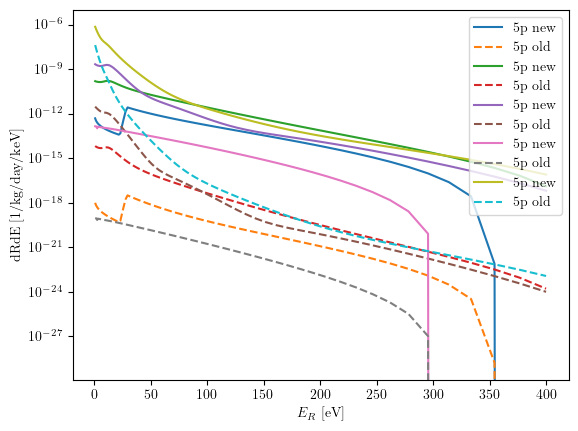

In [49]:
import matplotlib.pyplot as plt
import numericalunits as nu
for shell in dmrates.form_factor.keys:
    if shell in skip_keys[material]:
        continue
    plt.plot(erec,drs[shell],label=f"{test_shell} new")
    plt.plot(erec,drs_old[shell]*years_per_day,label=f"{test_shell} old",ls='--')

plt.yscale('log')
plt.xlabel('$E_R$ [eV]')
plt.legend()
plt.ylabel("dRdE [1/kg/day/keV]")
plt.show()
plt.close()


In [80]:
import torch
nes = torch.arange(1,17)
n_el, drsrates_old = dRdne(test_mX,test_cs,FDMn,e_er = None,isoangle=None,material='Xe',maxne = int(torch.max(nes)),ne='All',return_shells=True,useVerne=True,verbose=False,integrate=False)


In [81]:

rates_new_all,shells = dmrates.calculate_nobleGas_rates(test_mX,halo_model,FDMn,nes,isoangle=None,halo_id_params=None,useVerne=False,calcErrors=None,debug=False,returnShells=True)
shells

['Summed', '4p', '4d', '5s', '4s', '5p']

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_20655/4125883175.py:4: SyntaxWarning: invalid escape sequence '\c'
  title = f"$m_\chi$ = {test_mX} MeV/c$^2$, $\sigma_e =$ {test_cs} cm$^2$, FDM = {fdm_str}"
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_20655/4125883175.py:4: SyntaxWarning: invalid escape sequence '\s'
  title = f"$m_\chi$ = {test_mX} MeV/c$^2$, $\sigma_e =$ {test_cs} cm$^2$, FDM = {fdm_str}"


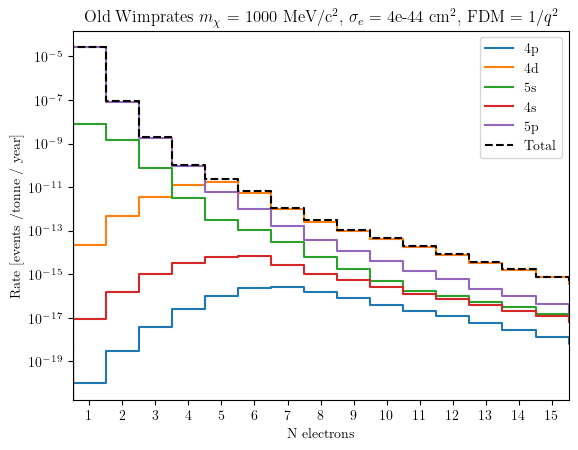

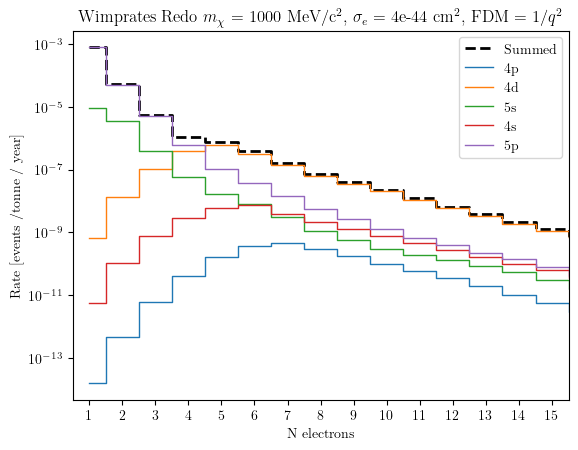

In [92]:
fdm_dict = {0: '1',
            2: '$1/q^2$'}
fdm_str = fdm_dict[FDMn]
title = f"$m_\chi$ = {test_mX} MeV/c$^2$, $\sigma_e =$ {test_cs} cm$^2$, FDM = {fdm_str}" 

plt.title('Old Wimprates '+title)# + (' -- SWAP 4s<->4p' if True else ''))
drsrates_old
for shell, rn in drsrates_old.items():
        plt.plot(n_el, np.array(rn), drawstyle='steps-mid', label=shell)
plt.plot(n_el, np.sum(np.array(list(drsrates_old.values())), axis=0),
            label='Total',
            drawstyle='steps-mid', 
            linestyle='--', 
            c='k')
plt.xticks(np.arange(1, 16))
plt.xlim(0.5, 15.5)
plt.xlabel("N electrons")
plt.legend()
plt.yscale('log')
plt.ylabel(f"Rate [events /tonne / year]")
plt.show()
plt.close()

plt.title('Wimprates Redo ' + title)# + (' -- SWAP 4s<->4p' if True else ''))


for i,key in enumerate(shells):
        ls = '--' if i == 0 else None
        c = 'k' if i ==0 else None
        lw = 2 if i == 0 else 1
        r = rates_new_all[0][:,i] * nu.tonne * nu.year
        plt.plot(nes,r,drawstyle='steps-mid',label=key,ls=ls,c=c,lw=lw)
plt.xticks(np.arange(1, 16))
plt.xlim(0.5, 15.5)
plt.xlabel("N electrons")
plt.legend()
plt.yscale('log')
plt.ylabel(f"Rate [events /tonne / year]")

plt.show()
plt.close()